In [1]:
from mesh import *

from VPINN_tri_final import *

from PROBDEF import PROBDEF

#TODO: change all types
#TODO: H1 ERROR ,interpolate error with line 
#TODO: bound error after reading the paper 

2023-11-27 19:03:19.398859: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-27 19:03:19.426976: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 19:03:19.645997: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 19:03:19.647193: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-27 19:03:20.631987: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co


my_types lib imported

generate mesh lib imported

interpolator_lib imported

settings_lib imported 



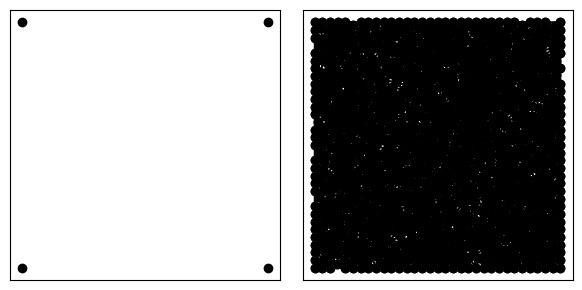

In [14]:
initializer=tf.keras.initializers.GlorotUniform(seed=42)


domain=((0,0),(1,0),(1,1),(0,1))

mesh=generate_mesh(domain,0.0006)



In [16]:
print(mesh['vertices'][0])

[0. 0.]


In [3]:
tfk=tf.keras
tfkl=tf.keras.layers

In [4]:
#glorot uniform is the key 
model = tfk.models.Sequential()
model.add(tf.keras.Input(shape=(2,),dtype=tf.float64))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))

In [5]:
print(model.summary())
#print(model.input_shape)
#print(model.output_shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371 (2.90 KB)
Trainable params: 371 (2.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [5]:
N_tests = 2
N_elements = [5, 5]


pb=PROBDEF()

params = {'scheme': 'VPINNs',
            'NN_struct': [2] + [5] * 3 + [1],
            'var_form': 1,
            'n_elements': tuple(N_elements),
            'n_test': [N_elements[0]*[N_tests], N_elements[1]*[N_tests]],
            'n_quad': 50,
            'n_bound': 80, # for every edge 
            'n_residual': 100,
            'domain': ((0.0, 1.0), (0.0, 1.0)),
            'Opt_Niter': 15000 + 1,
            'delta_test': 0.01,
            'N_test':N_tests}





In [6]:
vp=VPINN(pb,params,mesh,model)

-->mesh : 
     n_triangles :  260
     n_vertices  :  147
     n_edges     :  406
     h_max           :  0.1547958233662379
     h_min           :  0.06928793289317604
-->test_fun      : 
     order       :  2
     dof         :  489


In [7]:
print(vp.F_total_edges)

tf.Tensor(
[[-0.09158583]
 [-0.0906912 ]
 [-0.09537805]
 [-0.06658028]
 [-0.05639938]
 [-0.03616121]
 [-0.03210804]
 [-0.0565756 ]
 [-0.0508068 ]
 [-0.02615537]
 [-0.0277018 ]
 [-0.03091565]
 [-0.00703145]
 [-0.00525628]
 [-0.00266173]
 [-0.05166628]
 [-0.06326275]
 [-0.04738212]
 [-0.03257499]
 [-0.04523917]
 [-0.03680876]
 [-0.12132739]
 [-0.0899311 ]
 [-0.10871657]
 [-0.0523331 ]
 [-0.04907498]
 [-0.05866389]
 [-0.04927327]
 [-0.04935869]
 [-0.04045457]
 [-0.04688318]
 [-0.04951008]
 [-0.08323529]
 [-0.08468883]
 [-0.09857595]
 [-0.02617598]
 [-0.02862357]
 [-0.02837949]
 [-0.00537023]
 [ 0.        ]
 [-0.00354684]
 [-0.05132174]
 [-0.05021964]
 [-0.05365618]
 [-0.03599615]
 [-0.04132324]
 [-0.03066182]
 [-0.01345944]
 [-0.02051097]
 [-0.06276827]
 [-0.06960016]
 [-0.01809648]
 [-0.02023301]
 [-0.04884586]
 [-0.03958743]
 [-0.04146393]
 [-0.01057145]
 [-0.01051274]
 [-0.01991059]
 [ 0.        ]
 [-0.00959227]
 [-0.0048542 ]
 [-0.03352943]
 [-0.12426931]
 [-0.11051861]
 [-0.09382617]

In [8]:

#print(find_h(mesh)) #biggest and smaller of the edges 



history=vp.train(3000,0.001)



Iteration: 0 loss: 0.0079213111 time: 75.79299283027649
Iteration: 10 loss: 0.0049933810 time: 0.21724247932434082
Iteration: 20 loss: 0.0027723107 time: 0.31015872955322266
Iteration: 30 loss: 0.0013719562 time: 0.277604341506958
Iteration: 40 loss: 0.0006465646 time: 0.2594943046569824
Iteration: 50 loss: 0.0003367169 time: 0.27302122116088867
Iteration: 60 loss: 0.0002359956 time: 0.2688004970550537
Iteration: 70 loss: 0.0002176985 time: 0.2391948699951172
Iteration: 80 loss: 0.0002175439 time: 0.26018285751342773
Iteration: 90 loss: 0.0002163166 time: 0.2372739315032959
Iteration: 100 loss: 0.0002141238 time: 0.23446178436279297
Iteration: 110 loss: 0.0002125843 time: 0.2786591053009033
Iteration: 120 loss: 0.0002116024 time: 0.31629133224487305
Iteration: 130 loss: 0.0002107771 time: 0.28806185722351074
Iteration: 140 loss: 0.0002099820 time: 0.2989664077758789
Iteration: 150 loss: 0.0002092221 time: 0.3008735179901123
Iteration: 160 loss: 0.0002085024 time: 0.3043804168701172
Ite

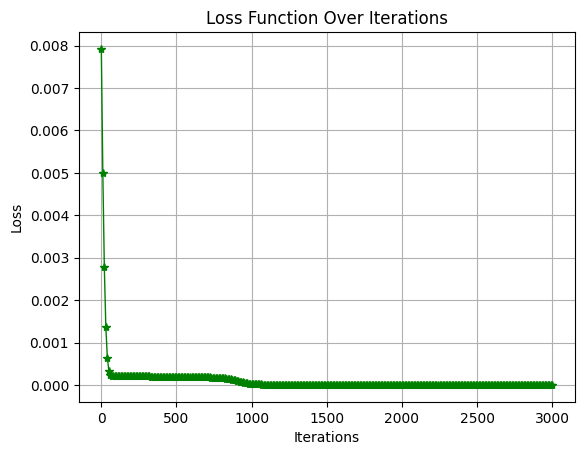

In [9]:
iterations = range(0, len(history) * 10, 10)  # Assuming losses are provided every 10 iterations

plt.plot(iterations, history, marker='*',color='green',linewidth=1)
plt.title('Loss Function Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

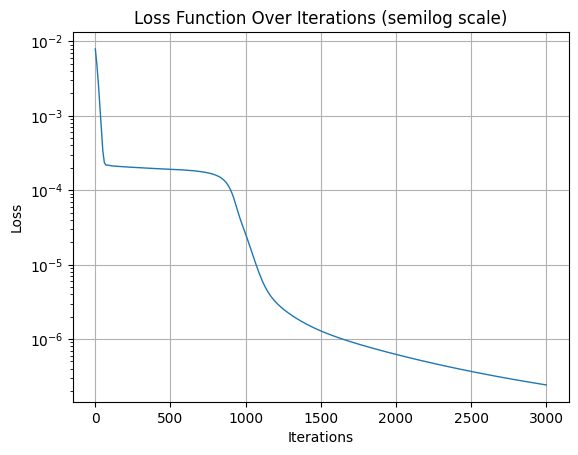

In [10]:
plt.semilogy(iterations, history,linewidth=1)
plt.title('Loss Function Over Iterations (semilog scale)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [18]:
#for the plots 

x=np.linspace(0,1,100,dtype=np.float32)

def u_exact(x,y):

    return np.cos(np.pi*(x+0.5))*np.sin(np.pi*y)


eval_exact=[u_exact(x[i],0.5) for i in range(len(x))]

eval_net=[vp.u_NN_BC(x[i],0.5) for i in range(len(x))]

eval_exact=np.array(eval_exact)
eval_net=np.array(eval_net)

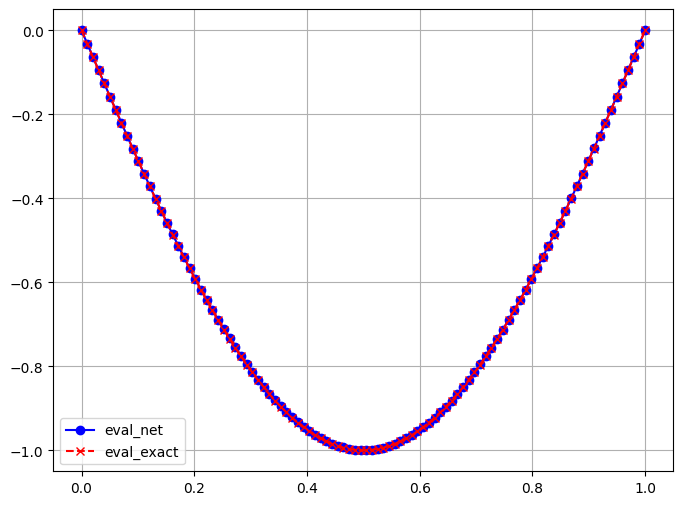

In [19]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the data
plt.plot(x, eval_net, label='eval_net', linestyle='-', marker='o', color='b')
plt.plot(x, eval_exact, label='eval_exact', linestyle='--', marker='x', color='r')
plt.grid()
plt.legend()

#if you want reproducibility put a seed


In [13]:
## Add surface plot
import numpy as np
x=np.linspace(0,1,50,dtype=np.float32)
XX,YY = np.meshgrid(x,x)
xx = XX.flatten()
yy = YY.flatten()

X = np.vstack((xx,yy)).transpose()
print(X)
Z = [vp.u_NN(x[0],x[1]) for x in X]

[[0.         0.        ]
 [0.02040816 0.        ]
 [0.04081633 0.        ]
 ...
 [0.9591837  1.        ]
 [0.97959185 1.        ]
 [1.         1.        ]]


KeyboardInterrupt: 

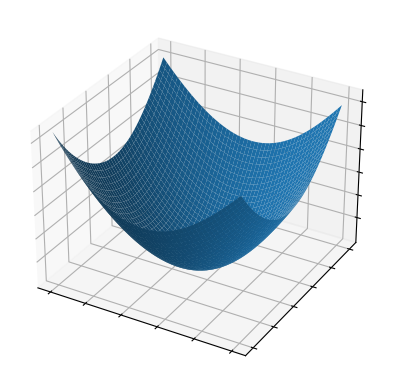

Text(0.5, 0.92, 'Original Code')

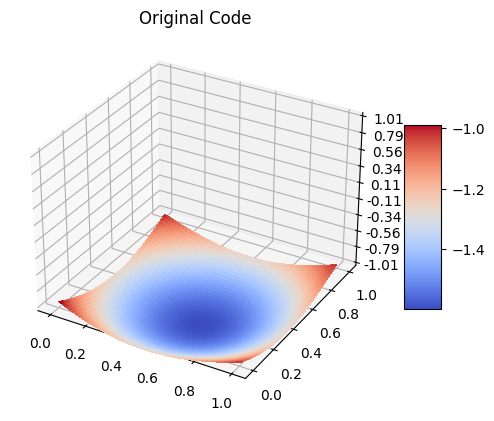

In [ ]:
# Plot the surface
z = np.array(Z).flatten().reshape((50,50))
# z = np.reshape(z, (50,50))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(XX, YY, z, vmin=z.min() * 2)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(XX, YY, z, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Original Code')

In [ ]:
#integration
from scipy.integrate import dblquad
integral,error=dblquad(lambda x,y: (u_exact(x,y)-vp.u_NN(x,y))**2, 0.0, 1.0,0.0, 1.0)

L2_error=np.sqrt(integral)
print(L2_error,error)

0.9806071545770484 1.440278755005207e-13
